# TASK 1: Data Analysis and Preprocessing

In [1]:
# Importing the necessary libraries
import os
import sys
import pandas as pd
from glob import glob
from pathlib import Path

In [2]:
# add the project root to the python path
project_root =  Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

### Loading the Dataset

In [3]:
# import functions from the utils module
from src.utils.data_loader import load_data
from importlib import reload
import src.utils.data_loader
reload(src.utils.data_loader)

<module 'src.utils.data_loader' from 'D:\\Research & Project\\10academy\\week 8\\challenge\\Fraud-detection-for-e-commerce-and-bank-credit\\src\\utils\\data_loader.py'>

In [4]:
raw_data_path = "../data/raw/Fraud_Data.csv"
df = load_data(raw_data_path)

In [5]:
print(50*"-")
# check data shape
print(f"Data shape: {df.shape}")
print(50*"-")
# check data types
print(f"Data types:\n{df.dtypes}")
print(50*"-")
# check first few rows
print(f"First few rows:\n{df.head()}")

--------------------------------------------------
Data shape: (151112, 11)
--------------------------------------------------
Data types:
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             object
browser            object
sex                object
age                 int64
ip_address        float64
class               int64
dtype: object
--------------------------------------------------
First few rows:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class

### Identifying and Handling Missing Values

In [6]:
# import the modules
from src.data_preprocessing.Preprocessor import Preprocessor
import src.data_preprocessing.Preprocessor
# reload the module to ensure the latest changes are reflected
reload(src.data_preprocessing.Preprocessor) 

<module 'src.data_preprocessing.Preprocessor' from 'D:\\Research & Project\\10academy\\week 8\\challenge\\Fraud-detection-for-e-commerce-and-bank-credit\\src\\data_preprocessing\\Preprocessor.py'>

In [7]:
# initialize the preprocessor
preprocessor = Preprocessor(df)

In [8]:
# identifying the missing values
print(50*"-")
missing_values=preprocessor.identify_missing_values()
print(f"Missing values:\n{missing_values}")

--------------------------------------------------
Missing values:
Series([], dtype: int64)


In [9]:
# reload the module to ensure the latest changes are reflected
reload(src.data_preprocessing.Preprocessor) 
# Handling missing values
print(50*"-")
df_cleaned = preprocessor.handle_missing_values()
print(f"Data shape after handling missing values: {df_cleaned.shape}")

--------------------------------------------------
Data shape after handling missing values: (151112, 11)


### Data Cleaning 

In [10]:
# removing duplicates
print(50*"-")
df_cleaned = preprocessor.remove_duplicates()
print(f"Data shape after removing duplicates: {df_cleaned.shape}")

--------------------------------------------------
Data shape after removing duplicates: (151112, 11)


In [11]:
# correct the data types
print(50*"-")
df_cleaned = preprocessor.correct_data_types()
print(f"Data types after correction:\n{df_cleaned.dtypes}")

--------------------------------------------------
Data types after correction:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                   category
dtype: object


###  Exploratory Data Analysis (EDA)

#### Basic Statistics

In [12]:
print(50*"-")
print("Basic Statistics of the dataset:")
df_cleaned.describe()

--------------------------------------------------
Basic Statistics of the dataset:


,user_id,signup_time,purchase_time,purchase_value,age,ip_address
count,151112.000000,151112,151112,151112.000000,151112.000000,1.511120e+05
mean,200171.040970,2015-04-20 00:56:09.511329280,2015-06-16 02:56:38.759952896,36.935372,33.140704,2.152145e+09
min,2.000000,2015-01-01 00:00:42,2015-01-01 00:00:44,9.000000,18.000000,5.209350e+04
25%,100642.500000,2015-02-18 09:52:48.500000,2015-04-18 14:41:25.500000,22.000000,27.000000,1.085934e+09
50%,199958.000000,2015-04-19 04:41:30,2015-06-18 13:46:17.500000,35.000000,33.000000,2.154770e+09
75%,300054.000000,2015-06-18 14:47:22.750000128,2015-08-17 18:48:31.500000,49.000000,39.000000,3.243258e+09
max,400000.000000,2015-08-18 04:40:29,2015-12-16 02:56:05,154.000000,76.000000,4.294850e+09
std,115369.285024,NaN,NaN,18.322762,8.617733,1.248497e+09


In [13]:
print(50*"-")
print("Number of unique values in each column:")
unique_values = df_cleaned.nunique()
print(unique_values)
print(50*"-")


--------------------------------------------------
Number of unique values in each column:
user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143512
class                  2
dtype: int64
--------------------------------------------------


In [14]:
# import modules for visualization
from src.data_preprocessing.Visualization import Visualization
import src.data_preprocessing.Visualization
# reload the module to ensure the latest changes are reflected
reload(src.data_preprocessing.Visualization)

<module 'src.data_preprocessing.Visualization' from 'D:\\Research & Project\\10academy\\week 8\\challenge\\Fraud-detection-for-e-commerce-and-bank-credit\\src\\data_preprocessing\\Visualization.py'>

#### Univariate Analysis

In [15]:
# initialize the visualizer
visualizer = Visualization(df_cleaned)

**************************************************
Numerical columns for visualization:
--------------------------------------------------


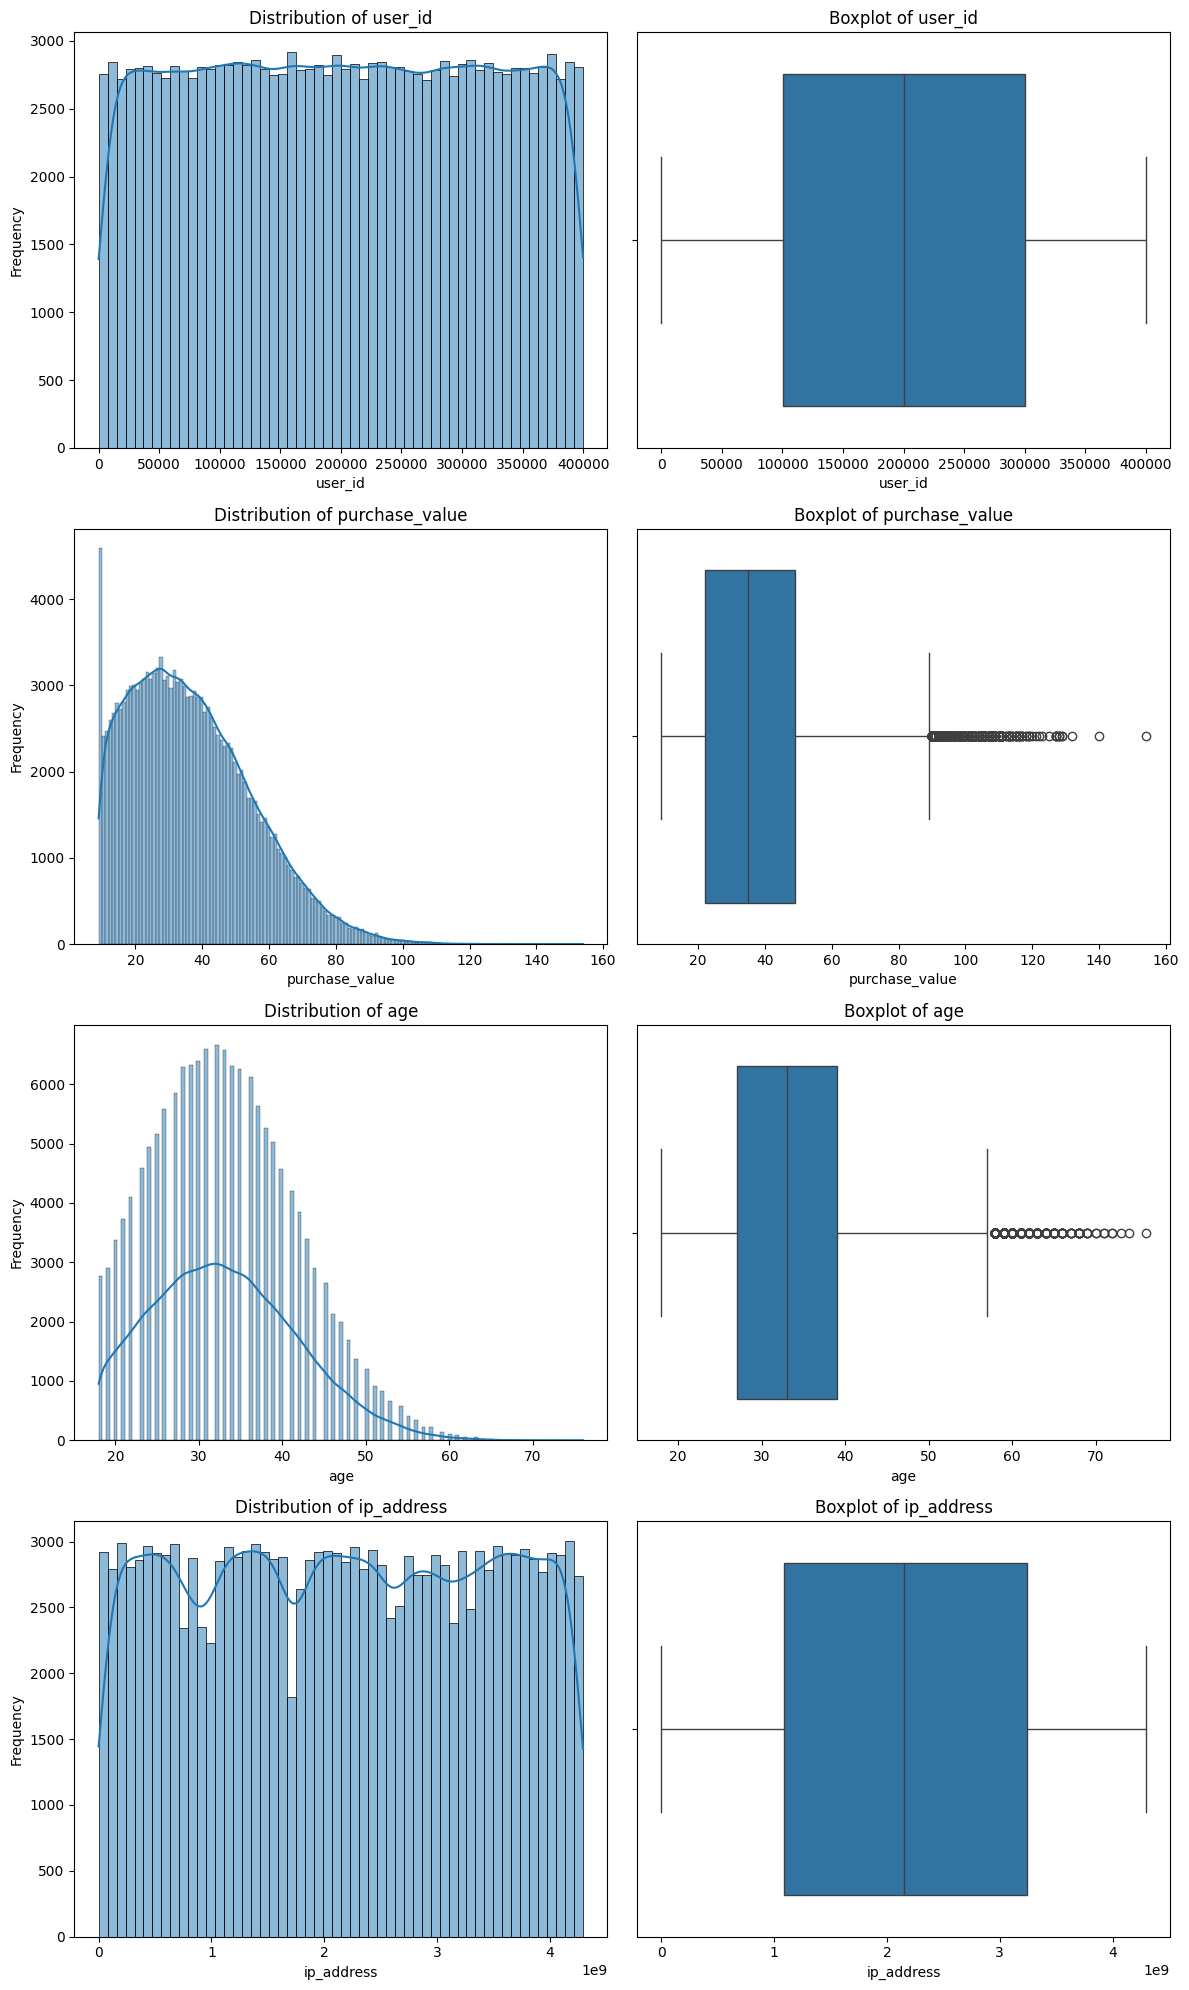

**************************************************
Categorical columns for visualization:
--------------------------------------------------


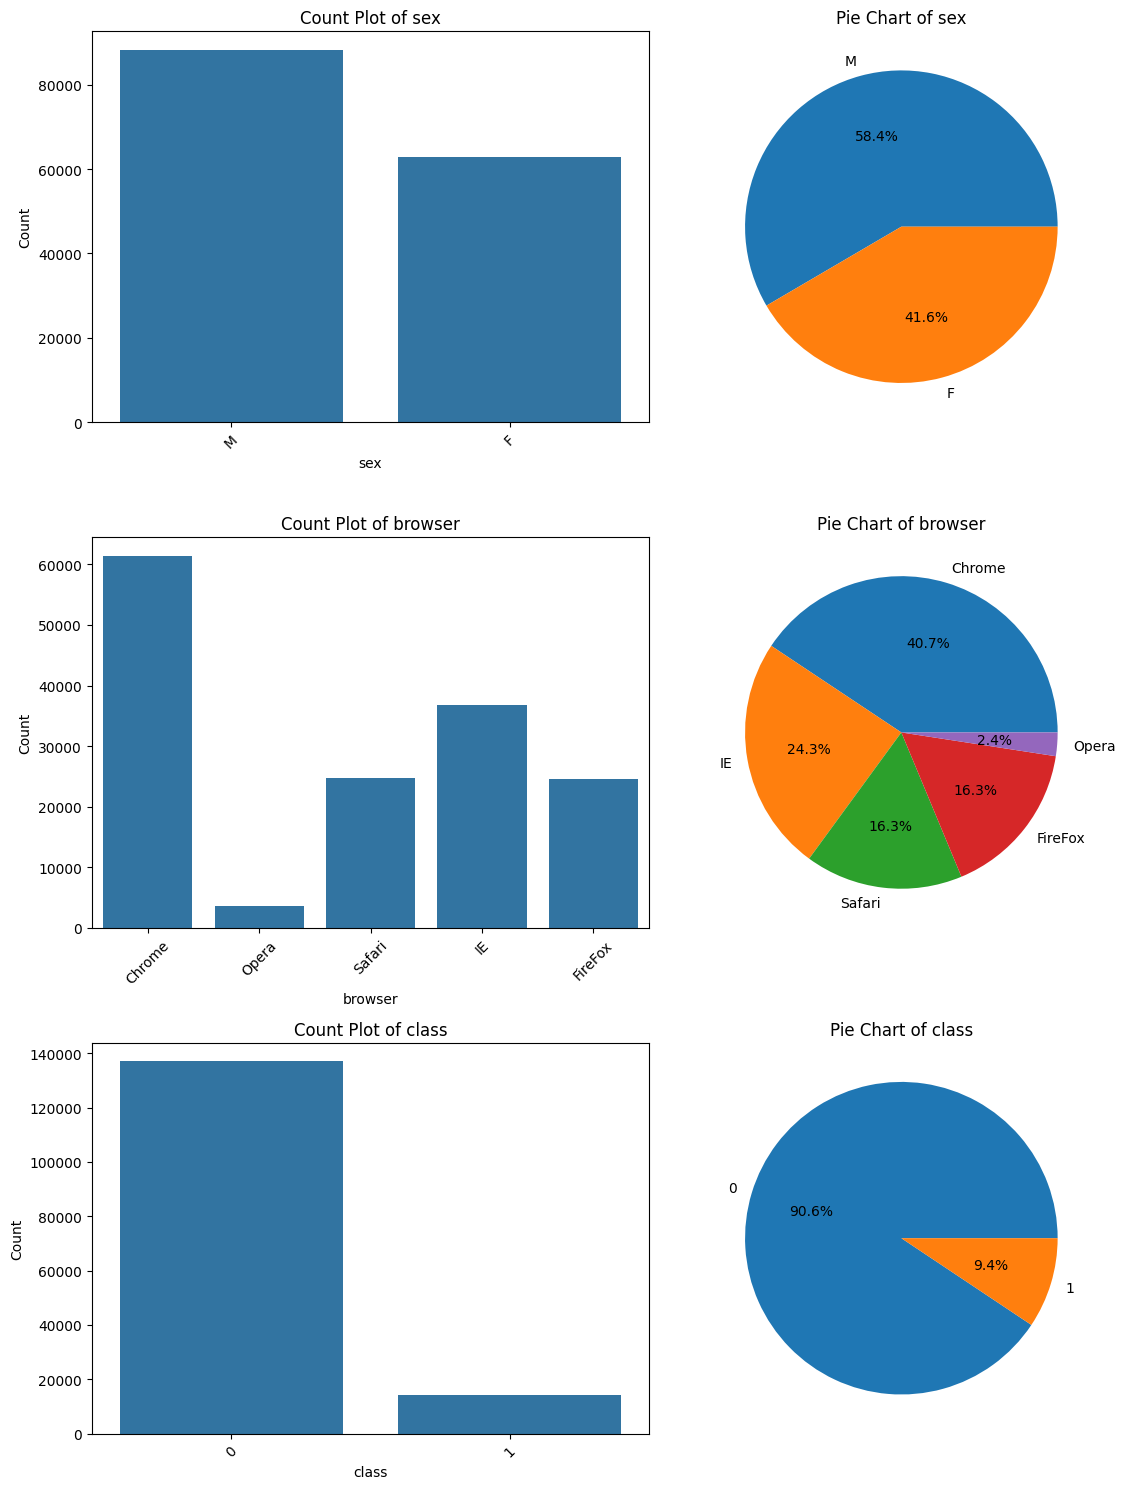

**************************************************
Frequency analysis of signup_time and purchase_time: by month and hour
--------------------------------------------------


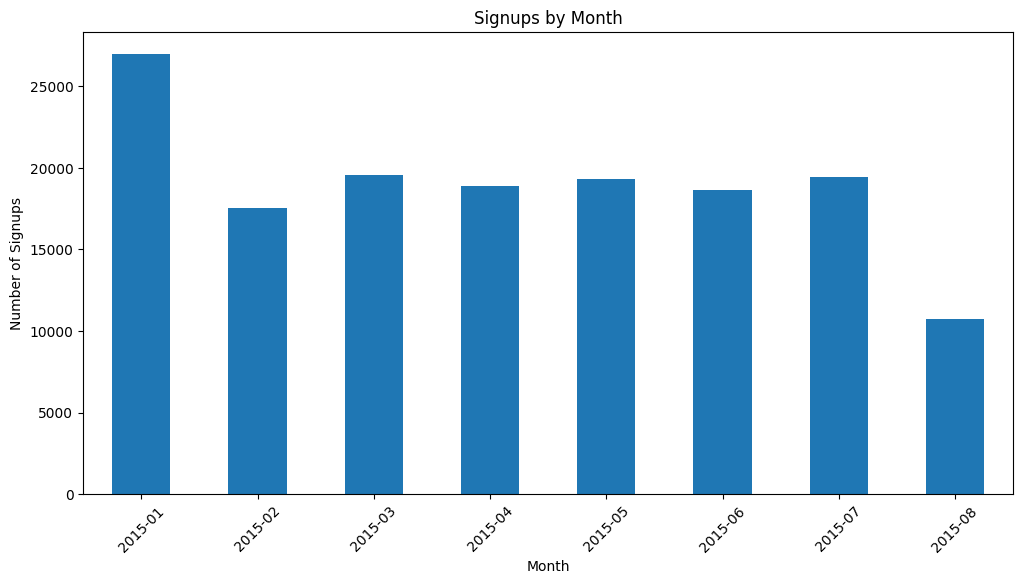

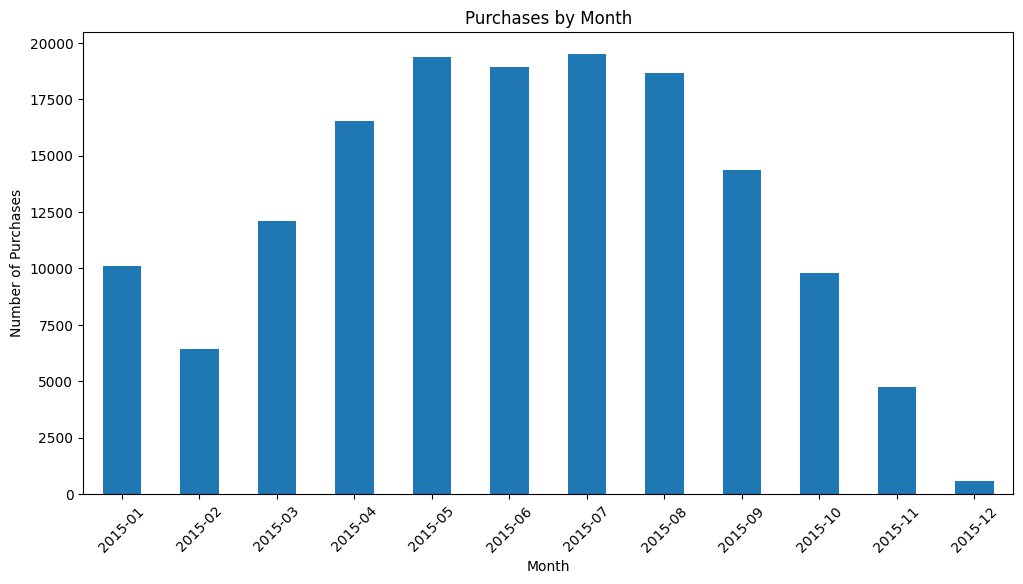

In [16]:
# plot univariate analysis
visualizer.univariate_analysis()